In [1]:
import re
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
f = open("../generator/output_snp_newkernel.log", "r").readlines()
lines = []
for a in f:
    if a.startswith("Starting"):
        b = a.rstrip()
        lines.append(b)
    elif ("Mbits/sec" in a):
        b = a.strip()
        lines.append(b)
        
# Placeholder for our data
data = []

# We'll skip every other line, because it's either empty or it's a 'Mbits/sec' line
for i in range(0, len(lines), 2):
    # Extract the numbers from the line
    numbers = re.findall(r'\d+', lines[i])
    # If we found any numbers, we'll also extract the Mbits/sec from the next line
    if numbers:
        numbers.append(re.findall(r'\d+', lines[i+1])[0])
        data.append(numbers)

# Now, we can write our data to a CSV file
with open('output_snp.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['cpusnort', 'psize', 'tcpflows', 'ratep', 'tput'])
    writer.writerows(data)

In [4]:
f_2 = open("../generator/output_vanilla_newkernel.log", "r").readlines()
lines_2 = []
for a in f_2:
    if a.startswith("Starting"):
        b = a.rstrip()
        lines_2.append(b)
    elif ("Mbits/sec" in a):
        b = a.strip()
        lines_2.append(b)

In [6]:
data_2 = []
# We'll skip every other line, because it's either empty or it's a 'Mbits/sec' line
for i in range(0, len(lines_2), 2):
    # Extract the numbers from the line
    numbers = re.findall(r'\d+', lines_2[i])
    # If we found any numbers, we'll also extract the Mbits/sec from the next line
    if numbers:
        numbers.append(re.findall(r'\d+', lines_2[i+1])[0])
        data_2.append(numbers)

# Now, we can write our data to a CSV file
with open('output_vanilla.csv', 'w', newline='') as file_2:
    writer = csv.writer(file_2)
    writer.writerow(['cpusnort', 'psize', 'tcpflows', 'ratep', 'tput'])
    writer.writerows(data_2)

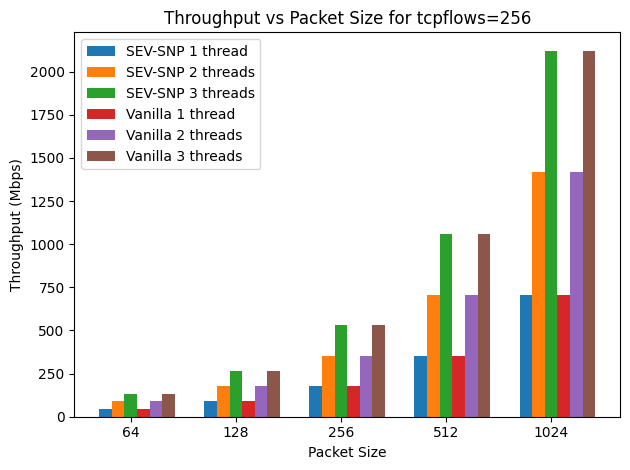

In [14]:
keys = ['cpusnort', 'psize', 'tcpflows', 'ratep', 'tput']
dict_data = [dict(zip(keys, row)) for row in data]
df = pd.DataFrame(dict_data)
df[keys] = df[keys].apply(pd.to_numeric)

df_filtered_1 = df[df['cpusnort'] == 1]
df_filtered_1 = df_filtered_1[df_filtered_1['tcpflows'] == 256]
df_filtered_1 = df_filtered_1[df_filtered_1['ratep'] == 3000]

df_filtered_2 = df[df['cpusnort'] == 2]
df_filtered_2 = df_filtered_2[df_filtered_2['tcpflows'] == 256]
df_filtered_2 = df_filtered_2[df_filtered_2['ratep'] == 3000]

df_filtered_3 = df[df['cpusnort'] == 3]
df_filtered_3 = df_filtered_3[df_filtered_3['tcpflows'] == 256]
df_filtered_3 = df_filtered_3[df_filtered_3['ratep'] == 3000]

dict_data_2 = [dict(zip(keys, row)) for row in data_2]
df_2 = pd.DataFrame(dict_data_2)
df_2[keys] = df[keys].apply(pd.to_numeric)

df_vanilla_1 = df_2[df_2['cpusnort'] == 1]
df_vanilla_1 = df_vanilla_1[df_vanilla_1['tcpflows'] == 256]
df_vanilla_1 = df_vanilla_1[df_vanilla_1['ratep'] == 3000]

df_vanilla_2 = df_2[df_2['cpusnort'] == 2]
df_vanilla_2 = df_vanilla_2[df_vanilla_2['tcpflows'] == 256]
df_vanilla_2 = df_vanilla_2[df_vanilla_2['ratep'] == 3000]

df_vanilla_3 = df[df['cpusnort'] == 3]
df_vanilla_3 = df_vanilla_3[df_vanilla_3['tcpflows'] == 256]
df_vanilla_3 = df_vanilla_3[df_vanilla_3['ratep'] == 3000]

y1 = df_filtered_1['tput']
y2 = df_filtered_2['tput']
y3 = df_filtered_3['tput']
y4 = df_vanilla_1['tput']
y5 = df_vanilla_2['tput']
y6 = df_vanilla_3['tput']

x = np.arange(len(df_filtered_1['psize']))

width = 0.12 

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, y1, width, label='SEV-SNP 1 thread')
rects2 = ax.bar(x - width, y2, width, label='SEV-SNP 2 threads')
rects3 = ax.bar(x, y3, width, label='SEV-SNP 3 threads')
rects4 = ax.bar(x + width, y4, width, label='Vanilla 1 thread')
rects5 = ax.bar(x + 2*width, y5, width, label='Vanilla 2 threads')
rects6 = ax.bar(x + 3*width, y6, width, label='Vanilla 3 threads')

ax.set_xlabel('Packet Size')
ax.set_ylabel('Throughput (Mbps)')
ax.set_title('Throughput vs Packet Size for tcpflows=256')
ax.set_xticks(x)
ax.set_xticklabels(df_filtered_1['psize'])
ax.legend()

fig.tight_layout()

plt.show()